In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  2


2023-07-31 17:46:45.036083: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:46:45.036275: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:46:45.050206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:46:45.050393: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:46:45.050529: I tensorflow/compiler/xla/stream_executo

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [5]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
import tensorflow

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import tensorflow as tf
# import cv2
import numpy as np
# import pandas as pd
import os

In [5]:
import pandas as pd

In [6]:
from sklearn import preprocessing

In [7]:
import cv2

In [8]:
import math

In [9]:
csv_file = "denser_data_collection.csv" #"denser_data_collection_marker.csv" #"data_collection.csv"
columns = ['Serial_no','Timestamp', 'x_actual', 'y_actual', 'direction', 'x_step', 'y_step']
data_df = pd.read_csv(csv_file, header=None, names = columns)

serial_numbers = data_df['Serial_no'].astype(str).apply(lambda x: int(x.split(',')[0]))

image_folder = "output_images_denser" #"output_images_denser_marker" #"cropped_noedges_new" #"output_images_new" #"images_resized_500"
imagess = []
parsed_custom_info = []

le = preprocessing.LabelEncoder()
data_df['direction'] = le.fit_transform(data_df['direction'])

# for index, info in enumerate(data_df[0]):



# serial_number = data_df['Serial_no.']
serial_numbers = set(data_df['Serial_no'])

date_time = data_df['Timestamp']
x_coordinate = data_df['x_actual']
y_coordinate = data_df['y_actual']
direction = data_df['direction']
x_step = data_df['x_step']
y_step = data_df['y_step']

# data_df = data_df[3000:]

image_files = os.listdir(image_folder)
imagess = []

contact = 0
non_contact = 1

for row in data_df.itertuples(index=False, name='data_df'):
    serial_number = row.Serial_no
    date_time = row.Timestamp
    x_coordinate = row.x_actual
    y_coordinate = row.y_actual
    direction = row.direction
    x_step = row.x_step
    y_step = row.y_step


    # if ~(pd.isna(x_coordinate) and pd.isna(y_coordinate)):
    # if ~(pd.isnull(x_coordinate) and pd.isnull(y_coordinate)):
    # if pd.notnull(x_coordinate) and pd.notnull(y_coordinate):
    # if not math.isnan(x_coordinate) and not math.isnan(y_coordinate):
    # if not x_coordinate.empty and not y_coordinate.empty:
    # if not(direction == 0 and x_coordinate > 4.49) or not(direction == 1 and y_coordinate < -18.81):

    ############################## contact data only
    if pd.notnull(x_coordinate) and pd.notnull(y_coordinate) and \
        not((direction == 0 and (x_coordinate > 4.49 or x_coordinate < -12.5)) \
               or (direction == 1 and (x_coordinate < -18.81 or x_coordinate > -3.075))):
            matching_files = [filename for filename in image_files if filename.startswith(str(serial_number))]
            if matching_files:
                image_name = matching_files[0]  # Assuming there is only one matching file
                image_path = os.path.join(image_folder, image_name)
                image = cv2.imread(image_path)
                # if image is not None: 
                imagess.append(image)
                parsed_custom_info.append([x_coordinate, y_coordinate, direction, contact])

    elif pd.notnull(x_coordinate) and pd.notnull(y_coordinate) and \
        ((direction == 0 and (x_coordinate > 4.49 or x_coordinate < -12.5)) \
               or (direction == 1 and (x_coordinate < -18.81 or x_coordinate > -3.075))):
            matching_files = [filename for filename in image_files if filename.startswith(str(serial_number))]
            if matching_files:
                image_name = matching_files[0]  # Assuming there is only one matching file
                image_path = os.path.join(image_folder, image_name)
                image = cv2.imread(image_path)
                # if image is not None: 
                imagess.append(image)
                parsed_custom_info.append([x_coordinate, y_coordinate, direction, non_contact])

In [10]:
# condition = data_df['direction'] == 0 and (data_df['x_coordinate'] > 4.49 or data_df['x_coordinate'] < -12.5)
# condition = pd.notnull(x_coordinate) and pd.notnull(y_coordinate) and \
#         not((direction == 0 and (x_coordinate > 4.49 or x_coordinate < -12.5)) \
#                or (direction == 1 and (x_coordinate < -18.81 or x_coordinate > -3.075)))

In [ ]:
# # condition = data_df['direction'] == 25
# name_to_fill1 = 'contact'
# name_to_fill2 = 'non-contact'

# # data_df['Mode_of_Interaction'] = name_to_fill1  # Fill the entire column with the default name
# data_df.loc[condition, 'Mode_of_Interaction'] = name_to_fill1  # Fill only the rows where the condition is True
# data_df.loc[~condition, 'Mode_of_Interaction'] = name_to_fill2

In [ ]:
# max_value = data_df['column_name'].max()

# # Find the minimum value
# min_value = data_df['column_name'].min()

# print("Maximum value:", max_value)
# print("Minimum value:", min_value)

In [10]:
print(data_df.shape)

(15710, 7)


In [47]:
# grouped = data_df.groupby(['direction'])
# df1 = grouped.get_group((0))
# df2 = grouped.get_group((1))

In [48]:
# print(df1.shape)
# print(df2.shape)

(1960, 7)
(1970, 7)


In [46]:
# print(data_df['direction'].isnull().sum())

0


In [2]:
!nvidia-smi

Tue Aug  1 15:01:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX 6000...  On   | 00000000:41:00.0 Off |                  Off |
| 30%   45C    P3    36W / 300W |      5MiB / 49140MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX 6000...  On   | 00000000:61:00.0 Off |                  Off |
| 48%   

In [12]:
data = list(zip(imagess, parsed_custom_info))


In [13]:
# from keras.backend.tensorflow_backend import set_session
from keras.backend import set_session

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
config = tf.ConfigProto()
# config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)


2023-07-31 17:50:27.017577: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:50:27.017739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:50:27.017870: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:50:27.017986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:50:27.018100: I tensorflow/compiler/xla/stream_executo

In [16]:
print(len(data))

15036


In [17]:
# Shuffle and split the dataset
np.random.shuffle(data)
train_ratio = 0.8
train_size = int(len(data) * train_ratio)

train_data = data[:train_size]
test_data = data[train_size:]

X_train = [item[0] for item in train_data]
Y_train = [item[1] for item in train_data]

X_test = [item[0] for item in test_data]
Y_test = [item[1] for item in test_data]

In [18]:
X_test1 = np.array(X_test)
X_train1 = np.array(X_train)

In [19]:
X_test1 = X_test1.astype('float32')
X_train1 = X_train1.astype('float32')

In [20]:
X_test1 /= 255

In [21]:
X_train1 /= 255

In [22]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [23]:
# check_nan = data_df['x_actual'].isnull().values.any()
# print(check_nan)

In [24]:
# if np.isnan(parsed_custom_info).any():
    # print("The array contains NaN values.")

In [25]:
# print(type(parsed_custom_info))

In [23]:
print("Shape X_train: ", np.shape(X_train1))
print("Shape Y_train: ", np.shape(Y_train))

print("Shape X_test: ", np.shape(X_test1))
print("Shape Y_test: ", np.shape(Y_test))



Shape X_train:  (12028, 1080, 1920, 3)
Shape Y_train:  (12028, 4)
Shape X_test:  (3008, 1080, 1920, 3)
Shape Y_test:  (3008, 4)


In [24]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [25]:
from keras.layers import MaxPooling2D

# ############################

In [26]:
# Y_train = np.nan_to_num(Y_train)


In [30]:
# import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         tf.config.experimental.set_memory_growth(gpus[0], True)
#     except RuntimeError as e:
#         print(e)


In [26]:
len(X_train1)

12028

In [27]:
n_batches = len(X_train1) / 32
print(n_batches)

375.875


In [28]:
n_batches = math.ceil(n_batches)
print(n_batches)

376


In [26]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1080, 1920, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))) #(1080, 1920, 3) #(1080, 1350, 3)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(4))  # Output layer with 4 units for regression




optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# Define the checkpoint path and directory
checkpoint_path = "checkpoints/weights_epoch_{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Check if a checkpoint file exists, if yes, load the weights
latest = tf.train.latest_checkpoint(checkpoint_dir)
if latest is not None:
    print("Loading weights from the latest checkpoint:", latest)
    model.load_weights(latest)


Loading weights from the latest checkpoint: checkpoints/weights_epoch_0040.ckpt


2023-07-29 15:28:37.980812: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-29 15:28:37.981017: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-29 15:28:37.981155: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-29 15:28:37.981280: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-29 15:28:37.981403: I tensorflow/compiler/xla/stream_executo

#    #######################

In [27]:


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1080, 1920, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))) #(1080, 1920, 3) #(1080, 1350, 3)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(4))  # Output layer with 4 units for regression




optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')








# Define the checkpoint path and directory
checkpoint_path = "checkpoints/weights_epoch_{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Check if a checkpoint file exists, if yes, load the weights
latest = tf.train.latest_checkpoint(checkpoint_dir)
if latest is not None:
    print("Loading weights from the latest checkpoint:", latest)
    model.load_weights(latest)

# Define batch size and calculate the number of batches per epoch
batch_size = 32
# n_batches = len(X_train1) // batch_size

# Create a callback that saves the model's weights only at even epochs
def save_model_at_even_epochs(epoch, logs):
    if epoch % 2 == 0:
        model.save_weights(checkpoint_path.format(epoch=epoch))

cp_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=save_model_at_even_epochs)

# Start training from the next epoch after the latest checkpoint
start_epoch = 0
if latest is not None:
    # Extract the epoch number from the checkpoint path
    start_epoch = int(latest.split("_")[-1].split(".")[0]) + 1

# Start training
history = model.fit(X_train1, Y_train, 
                    epochs=300,
                    initial_epoch=start_epoch,  # Start from the next epoch after the latest checkpoint
                    batch_size=batch_size, 
                    callbacks=[cp_callback])

Loading weights from the latest checkpoint: checkpoints/weights_epoch_0184.ckpt


2023-07-31 17:52:54.208119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:52:54.208345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:52:54.208492: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:52:54.208620: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 17:52:54.208744: I tensorflow/compiler/xla/stream_executo

Train on 12028 samples
Epoch 186/300


2023-07-31 17:52:57.214292: W tensorflow/c/c_api.cc:291] Operation '{name:'loss/AddN_1' id:162 op device:{requested: '', assigned: ''} def:{{{node loss/AddN_1}} = AddN[N=2, T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul, loss/AddN)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-07-31 17:53:09.023894: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 7.89GiB (rounded to 8468905984)requested by op conv2d/Relu
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-07-31 17:53:09.023962: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-07-31 17:53:09.023975: I t

ResourceExhaustedError: 2 root error(s) found.
  (0) RESOURCE_EXHAUSTED: OOM when allocating tensor with shape[32,32,1078,1918] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv2d/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[training/Adam/clip_by_norm_4/truediv/_83]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED: OOM when allocating tensor with shape[32,32,1078,1918] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv2d/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored.

# Making preictions by loading the weights

In [27]:
# predictions = model.predict(X_new)
sample_index = 5  # Replace with the index of the desired sample

sample = np.expand_dims(X_test1[sample_index], axis=0) 

y_pred = model.predict(sample)

print('Prediction:', y_pred)

/usr/lib/python3/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-07-29 15:28:53.663538: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_1/BiasAdd' id:110 op device:{requested: '', assigned: ''} def:{{{node dense_1/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_1/MatMul, dense_1/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-07-29 15:28:54.855554: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700


Prediction: [[-13.773119   -24.760492     0.30121353   0.68982846]]


2023-07-29 15:28:55.283879: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [28]:
print(Y_test[5])

[-14.24978661 -24.63892009   0.           1.        ]


# Making predictions by loading a saved model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model from the .h5 file
model_path = "path/to/your/model.h5"
model = load_model(model_path)

# Assuming you have new data for prediction, you can use model.predict()
# For example, if you have new data in X_new, you can make predictions as follows:
# Load your new data for prediction, replace X_new with your data
X_new = ...

# Make predictions using the loaded model
predictions = model.predict(X_new)

# Print or use the predictions as required
print(predictions)

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1080, 1920, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))) #(1080, 1920, 3) #(1080, 1350, 3)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(4))  # Output layer with 4 units for regression




optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')





# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "checkpoints/weights_epoch_{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# if os.path.exists(checkpoint_path.format(epoch=28)):
#     model.load_weights(checkpoint_path.format(epoch=28))

# Check if a checkpoint file exists, if yes, load the weights
latest = tf.train.latest_checkpoint(checkpoint_dir)
if latest is not None:
    print("Loading weights from the latest checkpoint:", latest)
    model.load_weights(latest)


batch_size = 32

# Calculate the number of batches per epoch
import math
n_batches = len(X_train1) / batch_size
# n_batches = math.ceil(n_batches)    # round up the number of batches to the nearest whole integer


cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=math.ceil(2*n_batches)) #len(X_train1) / batch_size



# Save the weights using the `checkpoint_path` format
# model.save_weights(checkpoint_path.format(epoch=0))

# Start training from the next epoch after the latest checkpoint
start_epoch = 0
if latest is not None:
    # Extract the epoch number from the checkpoint path
    start_epoch = int(latest.split("_")[-1].split(".")[0]) + 1

history = model.fit(X_train1, Y_train, 
          epochs=300,
          initial_epoch=start_epoch,
          batch_size=batch_size, 
          callbacks=[cp_callback])

Loading weights from the latest checkpoint: checkpoints/weights_epoch_0028.ckpt


2023-07-29 11:11:17.668792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-29 11:11:17.668995: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-29 11:11:17.669136: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-29 11:11:17.669262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-29 11:11:17.669386: I tensorflow/compiler/xla/stream_executo

Train on 12028 samples
Epoch 30/300


2023-07-29 11:11:20.357336: W tensorflow/c/c_api.cc:291] Operation '{name:'loss/AddN_1' id:184 op device:{requested: '', assigned: ''} def:{{{node loss/AddN_1}} = AddN[N=2, T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul, loss/AddN)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-07-29 11:11:21.968436: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2023-07-29 11:11:22.626128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-07-29 11:11:24.198530: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix mult

12028/12028 [==============================] - 648s 54ms/sample - loss: 8.0001
Epoch 31/300
12000/12028 [============================>.] - ETA: 1s - loss: 7.0954
Epoch 31: saving model to checkpoints/weights_epoch_0031.ckpt
12028/12028 [==============================] - 634s 53ms/sample - loss: 7.0972
Epoch 32/300
12028/12028 [==============================] - 629s 52ms/sample - loss: 6.6084
Epoch 33/300
12000/12028 [============================>.] - ETA: 1s - loss: 6.2037
Epoch 33: saving model to checkpoints/weights_epoch_0033.ckpt
12028/12028 [==============================] - 630s 52ms/sample - loss: 6.2049
Epoch 34/300
12028/12028 [==============================] - 628s 52ms/sample - loss: 6.0901
Epoch 35/300
  288/12028 [..............................] - ETA: 10:11 - loss: 4.9488

KeyboardInterrupt: 

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1080, 1920, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))) #(1080, 1920, 3) #(1080, 1350, 3)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(4))  # Output layer with 4 units for regression




optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

def checkpoint_name(epoch, logs):
    return os.path.join(checkpoint_dir, f"weights_epoch_{epoch:02d}.h5")
# def checkpoint_name(epoch):
#     return os.path.join(checkpoint_dir, f"weights_epoch_{epoch}.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath= checkpoint_name,
    save_weights_only=True,    # save weights only, not the entire model
    period=1  # Save every 10 epochs
)

# Train the model with the checkpoint callback
history = model.fit(X_train1, Y_train, epochs=50, batch_size=32, callbacks=[checkpoint_callback])


Train on 12028 samples
Epoch 1/50


2023-07-28 22:28:53.265573: W tensorflow/c/c_api.cc:291] Operation '{name:'training_2/Adam/dense_3/bias/v/Assign' id:1079 op device:{requested: '', assigned: ''} def:{{{node training_2/Adam/dense_3/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_2/Adam/dense_3/bias/v, training_2/Adam/dense_3/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-07-28 22:28:55.289514: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.89GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


   32/12028 [..............................] - ETA: 15:14 - loss: 224.3641

2023-07-28 22:29:06.326863: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.92GiB (rounded to 4209942528)requested by op training_2/Adam/gradients/gradients/conv2d_4/BiasAdd_grad/BiasAddGrad
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-07-28 22:29:06.326907: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-07-28 22:29:06.326922: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 104, Chunks in use: 103. 26.0KiB allocated for chunks. 25.8KiB in use in bin. 8.1KiB client-requested in use in bin.
2023-07-28 22:29:06.326930: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 1, Chunks in use: 0. 512B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2023-

ResourceExhaustedError: OOM when allocating tensor with shape[2048,513909] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_2/Adam/gradients/gradients/conv2d_4/BiasAdd_grad/BiasAddGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.


In [ ]:
model.load_weights("path_to_your_saved_weights.h5")  

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1080, 1920, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001))) #(1080, 1920, 3) #(1080, 1350, 3)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(4))  # Output layer with 3 units for regression

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train1, Y_train, epochs=50, batch_size=32)

Train on 8692 samples
Epoch 1/50


2023-07-25 13:22:15.610083: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-07-25 13:22:15.736265: W tensorflow/c/c_api.cc:291] Operation '{name:'training/Adam/dense_1/kernel/v/Assign' id:408 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_1/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_1/kernel/v, training/Adam/dense_1/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-07-25 13:22:18.084351: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will o

8692/8692 [==============================] - 286s 33ms/sample - loss: 785.0329
Epoch 2/50
8692/8692 [==============================] - 274s 32ms/sample - loss: 25.6952
Epoch 3/50
8692/8692 [==============================] - 275s 32ms/sample - loss: 24.4339
Epoch 4/50
8692/8692 [==============================] - 275s 32ms/sample - loss: 23.9605
Epoch 5/50
8692/8692 [==============================] - 271s 31ms/sample - loss: 22.5596
Epoch 6/50
8692/8692 [==============================] - 272s 31ms/sample - loss: 22.7819
Epoch 7/50
8692/8692 [==============================] - 273s 31ms/sample - loss: 22.0148
Epoch 8/50
8692/8692 [==============================] - 272s 31ms/sample - loss: 20.0527
Epoch 9/50
8692/8692 [==============================] - 273s 31ms/sample - loss: 19.0347
Epoch 10/50
8692/8692 [==============================] - 273s 31ms/sample - loss: 18.8331
Epoch 11/50
8692/8692 [==============================] - 273s 31ms/sample - loss: 17.6107
Epoch 12/50
8692/8692 [======

In [32]:
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1080, 1920, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)))


In [33]:
# model.add(MaxPooling2D((2, 2)))


In [34]:
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))


In [35]:
# model.add(MaxPooling2D((2, 2)))


In [36]:
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))


In [37]:
# model.add(Flatten())


In [38]:
# model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))


In [39]:
# model.add(Dense(3))  # Output layer with 3 units for regression


In [40]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)


In [41]:
# model.compile(optimizer=optimizer, loss='mean_squared_error')


In [25]:
model.save("contact_noncontact_model_50ep.h5")


In [26]:
!nvidia-smi

Tue Jul 25 02:28:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX 6000...  On   | 00000000:41:00.0 Off |                  Off |
| 42%   66C    P2    84W / 300W |  47843MiB / 49140MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX 6000...  On   | 00000000:61:00.0 Off |                  Off |
| 30%   

In [27]:
import matplotlib.pyplot as plt

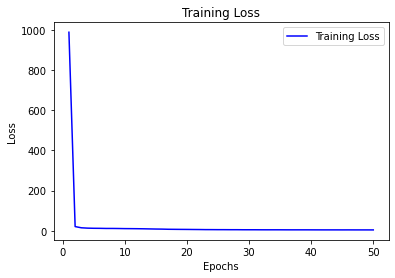

In [28]:
# Obtain the loss values from the training history
loss_values = history.history['loss']

# Plot the loss graph
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim(0, len(loss_values) + 1)
# plt.ylim(0, max(loss_values) + 100)
plt.legend()
plt.show()

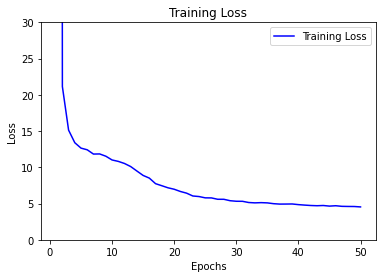

In [29]:
# Obtain the loss values from the training history
loss_values = history.history['loss']

# Plot the loss graph
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim(0, len(loss_values) + 1)
# plt.ylim(0, max(loss_values) + 100)
plt.ylim(0, 30)

plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [31]:
#Evaluation

Y_pred = model.predict(X_test1)

mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(Y_test, Y_pred)

r2 = r2_score(Y_test, Y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

/usr/lib/python3/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-07-25 02:28:08.446114: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_1/BiasAdd' id:110 op device:{requested: '', assigned: ''} def:{{{node dense_1/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_1/MatMul, dense_1/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Mean Squared Error (MSE): 16.439082820995
Root Mean Squared Error (RMSE): 4.05451388220524
Mean Absolute Error (MAE): 1.9492433203539943
R-squared (R2): 0.3702791126089917


In [32]:
sample_index = 6  # Replace with the index of the desired sample

sample = np.expand_dims(X_test1[sample_index], axis=0) 

y_pred = model.predict(sample)

print('Prediction:', y_pred)

Prediction: [[  1.4242349 -22.93267     0.7981034   1.1876472]]


In [33]:
print(Y_test[6])

[  4.33842565 -22.12015385   1.           1.        ]


In [34]:
sample_index = 15  # Replace with the index of the desired sample

sample = np.expand_dims(X_test1[sample_index], axis=0) 

y_pred = model.predict(sample)

print('Prediction:', y_pred)

Prediction: [[-13.584453   -28.08273      0.31239802   0.67342305]]


In [35]:
print(Y_test[15])

[-16.88556385 -25.87927952   0.           1.        ]


In [36]:
sample_index = 32  # Replace with the index of the desired sample

sample = np.expand_dims(X_test1[sample_index], axis=0) 

y_pred = model.predict(sample)

print('Prediction:', y_pred)

Prediction: [[ -1.052757  -33.802345    0.5072885   0.6418066]]


In [37]:
print(Y_test[32])

[  2.17081855 -30.74475237   0.           0.        ]


In [5]:
sess.close()
tf.reset_default_graph()


In [1]:
!nvidia-smi

Fri Jul 28 10:38:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX 6000...  On   | 00000000:41:00.0 Off |                  Off |
| 55%   77C    P2   270W / 300W |  40369MiB / 49140MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX 6000...  On   | 00000000:61:00.0 Off |                  Off |
| 30%   